In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import LinearSVC

In [3]:
df = pd.read_csv("vehicles.csv")

In [4]:
# removing invalid data
df = df[df["price"] != 0] # drop data with price == 0

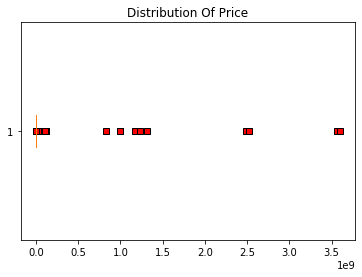

In [5]:
# removing outliers
red_square = dict(markerfacecolor='r', marker='s')
plt.title('Distribution Of Price')
plt.boxplot(df['price'], vert=False, flierprops=red_square)
plt.show()

In [6]:
df = df[df['price'] < 300000]

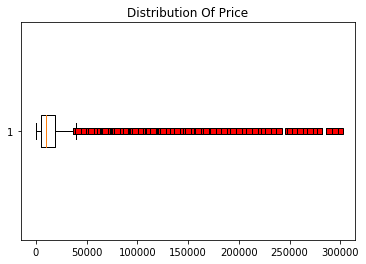

In [7]:
red_square = dict(markerfacecolor='r', marker='s')
plt.title('Distribution Of Price')
plt.boxplot(df['price'], vert=False, flierprops=red_square)
plt.show()

#### Delete: id, url, region_url, price == 0, vin, image_url, description

In [8]:
X, Y = df.drop(labels=["id", "url", "region_url", "price", "model", "vin", "image_url", "description", "county"], axis=1), df["price"]

In [9]:
X.head()

,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,salt lake city,2012.0,volkswagen,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black,ut,40.7372,-111.858
2,salt lake city,2015.0,gmc,excellent,NaN,gas,7554.0,clean,automatic,4wd,NaN,NaN,white,ut,40.5881,-111.884
4,salt lake city,2018.0,ford,NaN,NaN,diesel,70150.0,clean,automatic,4wd,NaN,pickup,white,ut,40.3744,-104.694
5,salt lake city,2009.0,ram,NaN,NaN,gas,120057.0,clean,automatic,4wd,NaN,pickup,silver,ut,40.3744,-104.694
6,salt lake city,2017.0,ford,NaN,NaN,diesel,95484.0,clean,automatic,4wd,NaN,pickup,white,ut,40.3744,-104.694


In [10]:
Y.head()

0    17899
2    46463
4    49999
5    13999
6    34500
Name: price, dtype: int64

In [11]:
X.dtypes

region           object
year            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
lat             float64
long            float64
dtype: object

In [12]:
X.shape

(465897, 16)

#### Delete: id, url, region_url, price == 0, vin, image_url, description

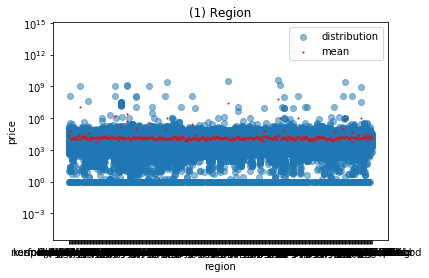

In [9]:
plt.title("(1) Region")
plt.xlabel("region")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["region"].dropna(), Y[X["region"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["region"].unique()), Y.groupby(X["region"]).mean(), c="r", label="mean", s=1)
plt.legend()

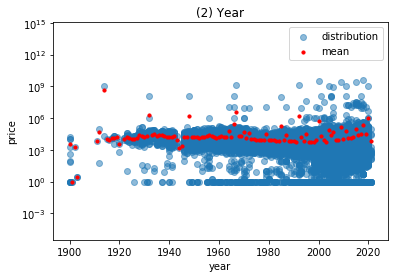

In [10]:
plt.title("(2) Year")
plt.xlabel("year")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["year"], Y, label="distribution", alpha=0.5)
plt.scatter(sorted(X["year"].dropna().unique()), Y.groupby(X["year"]).mean(), c="r", label="mean", s=10)
plt.legend()

/opt/anaconda3/envs/COMS4995/lib/python3.8/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/opt/anaconda3/envs/COMS4995/lib/python3.8/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/opt/anaconda3/envs/COMS4995/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/COMS4995/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


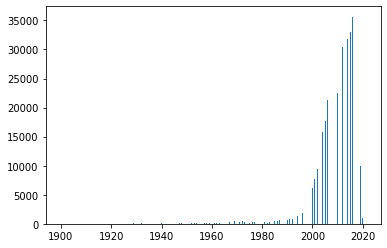

In [52]:
plt.hist(X['year'], bins='auto')
plt.show()

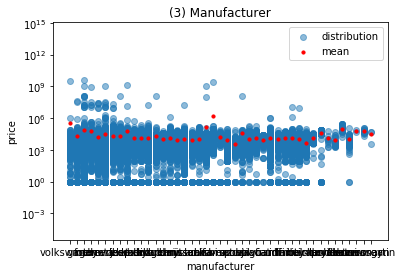

In [11]:
plt.title("(3) Manufacturer")
plt.xlabel("manufacturer")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["manufacturer"].dropna(), Y[X["manufacturer"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["manufacturer"].dropna().unique()), Y.groupby(X["manufacturer"]).mean(), c="r", label="mean", s=10)
plt.legend()

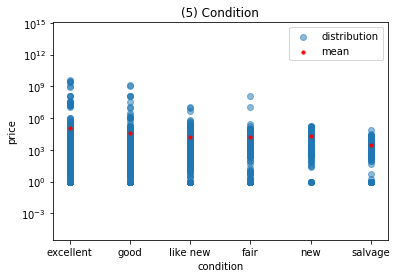

In [13]:
plt.title("(4) Condition")
plt.xlabel("condition")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["condition"].dropna(), Y[X["condition"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["condition"].dropna().unique()), Y.groupby(X["condition"]).mean(), c="r", label="mean", s=10)
plt.legend()

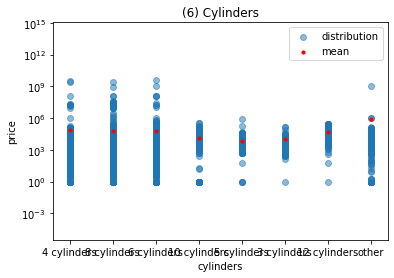

In [14]:
plt.title("(5) Cylinders")
plt.xlabel("cylinders")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["cylinders"].dropna(), Y[X["cylinders"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["cylinders"].dropna().unique()), Y.groupby(X["cylinders"]).mean(), c="r", label="mean", s=10)
plt.legend()

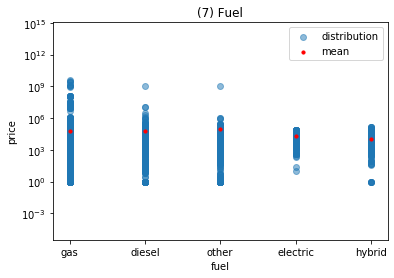

In [15]:
plt.title("(6) Fuel")
plt.xlabel("fuel")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["fuel"].dropna(), Y[X["fuel"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["fuel"].dropna().unique()), Y.groupby(X["fuel"]).mean(), c="r", label="mean", s=10)
plt.legend()

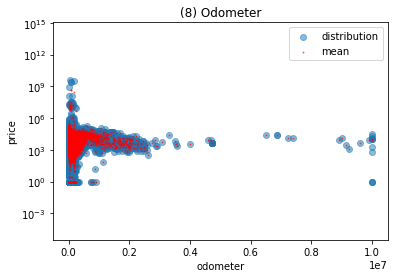

In [16]:
plt.title("(7) Odometer")
plt.xlabel("odometer")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["odometer"], Y, label="distribution", alpha=0.5)
plt.scatter(sorted(X["odometer"].dropna().unique()), Y.groupby(X["odometer"]).mean(), c="r", label="mean", s=1, alpha=0.5)
plt.legend()

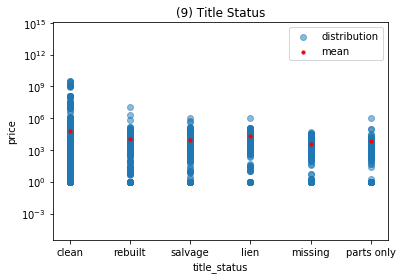

In [17]:
plt.title("(8) Title Status")
plt.xlabel("title_status")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["title_status"].dropna(), Y[X["title_status"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["title_status"].dropna().unique()), Y.groupby(X["title_status"]).mean(), c="r", label="mean", s=10)
plt.legend()

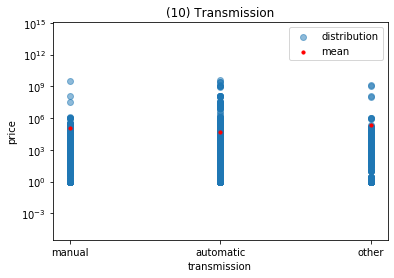

In [18]:
plt.title("(9) Transmission")
plt.xlabel("transmission")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["transmission"].dropna(), Y[X["transmission"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["transmission"].dropna().unique()), Y.groupby(X["transmission"]).mean(), c="r", label="mean", s=10)
plt.legend()

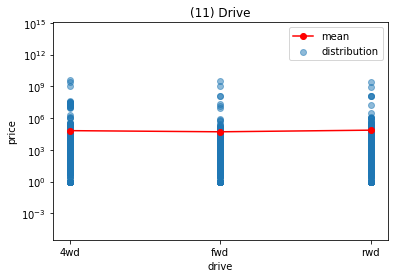

In [19]:
plt.title("(10) Drive")
plt.xlabel("drive")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["drive"].dropna(), Y[X["drive"].notnull()], label="distribution", alpha=0.5)
plt.plot(sorted(X["drive"].dropna().unique()), Y.groupby(X["drive"]).mean(), "o-", c="r", label="mean")
plt.legend()

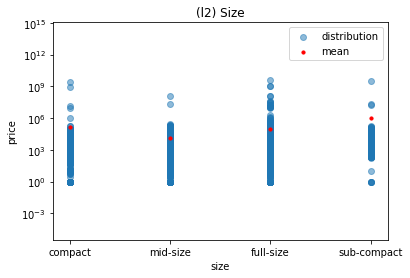

In [20]:
plt.title("(l1) Size")
plt.xlabel("size")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["size"].dropna(), Y[X["size"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["size"].dropna().unique()), Y.groupby(X["size"]).mean(), c="r", label="mean", s=10)
plt.legend()

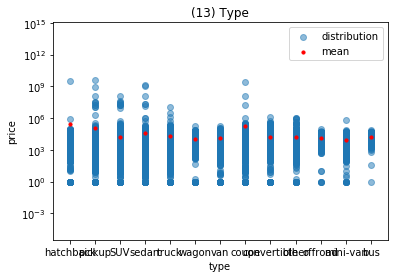

In [21]:
plt.title("(12) Type")
plt.xlabel("type")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["type"].dropna(), Y[X["type"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["type"].dropna().unique()), Y.groupby(X["type"]).mean(), c="r", label="mean", s=10)
plt.legend()

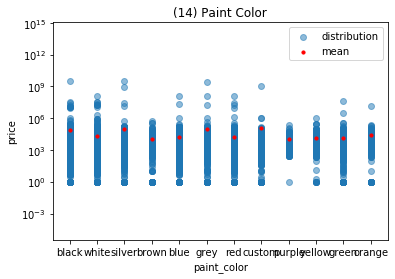

In [22]:
plt.title("(13) Paint Color")
plt.xlabel("paint_color")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["paint_color"].dropna(), Y[X["paint_color"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["paint_color"].dropna().unique()), Y.groupby(X["paint_color"]).mean(), c="r", label="mean", s=10)
plt.legend()

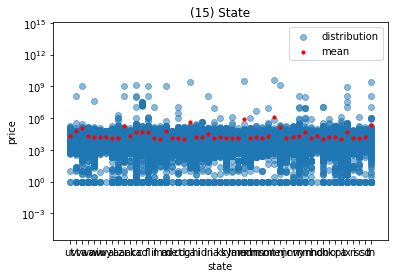

In [23]:
plt.title("(14) State")
plt.xlabel("state")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["state"].dropna(), Y[X["state"].notnull()], label="distribution", alpha=0.5)
plt.scatter(sorted(X["state"].dropna().unique()), Y.groupby(X["state"]).mean(), c="r", label="mean", s=10)
plt.legend()

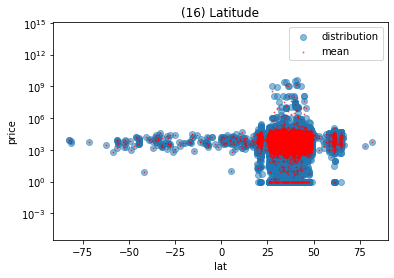

In [24]:
plt.title("(15) Latitude")
plt.xlabel("lat")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["lat"], Y, label="distribution", alpha=0.5)
plt.scatter(sorted(X["lat"].dropna().unique()), Y.groupby(X["lat"]).mean(), c="r", label="mean", s=1, alpha=0.5)
plt.legend()

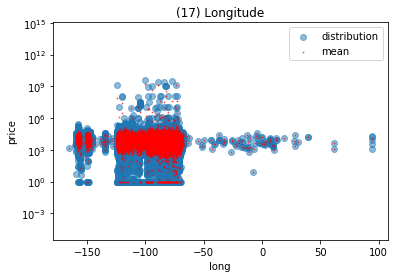

In [25]:
plt.title("(16) Longitude")
plt.xlabel("long")
plt.ylabel("price")
plt.yscale("log")
plt.scatter(X["long"], Y, label="distribution", alpha=0.5)
plt.scatter(sorted(X["long"].dropna().unique()), Y.groupby(X["long"]).mean(), c="r", label="mean", s=1, alpha=0.5)
plt.legend()

In [13]:
X.head()

,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,salt lake city,2012.0,volkswagen,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black,ut,40.7372,-111.858
2,salt lake city,2015.0,gmc,excellent,NaN,gas,7554.0,clean,automatic,4wd,NaN,NaN,white,ut,40.5881,-111.884
4,salt lake city,2018.0,ford,NaN,NaN,diesel,70150.0,clean,automatic,4wd,NaN,pickup,white,ut,40.3744,-104.694
5,salt lake city,2009.0,ram,NaN,NaN,gas,120057.0,clean,automatic,4wd,NaN,pickup,silver,ut,40.3744,-104.694
6,salt lake city,2017.0,ford,NaN,NaN,diesel,95484.0,clean,automatic,4wd,NaN,pickup,white,ut,40.3744,-104.694


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [15]:
cat_target = ["region", "manufacturer", "state"]
cat_ohe = ["condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color"]
cont = ["year", "odometer", "lat", "long"]

In [19]:
cont_preprocess = make_pipeline(
    SimpleImputer(),
    StandardScaler())

cat_ohe_preprocess = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown="ignore"))

cat_target_preprocess = make_pipeline(
    TargetEncoder(cols=cat_target), 
    StandardScaler())

preprocess = make_column_transformer(
    (cont_preprocess, cont),
    (cat_ohe_preprocess, cat_ohe),
    (cat_target_preprocess, cat_target))

In [20]:
cross_val_score(make_pipeline(preprocess, LinearRegression()), X_train, Y_train)

array([0.40414076, 0.39347529, 0.40360047, 0.39460077, 0.39529234])

# Task 4

In [23]:
cross_val_score(make_pipeline(preprocess, DecisionTreeRegressor(max_depth=5)), X_train, Y_train)

array([0.51692294, 0.49565263, 0.50129618, 0.52675494, 0.50250267])

In [31]:
cross_val_score(make_pipeline(preprocess, RandomForestRegressor(n_estimators=100, max_depth=5)), X_train, Y_train)

array([0.51983798, 0.514984  , 0.5187934 , 0.51064071, 0.51672112])

In [18]:
cross_val_score(make_pipeline(preprocess, XGBRegressor(max_depth=5)), X_train, Y_train)

array([0.74545323, 0.72233853, 0.73185768, 0.74436536, 0.71838025])

In [36]:
xgb = make_pipeline(preprocess, XGBRegressor(max_depth=5))
param_grid = {'xgbregressor__max_depth':range(1,6)}
best_xgb = GridSearchCV(xgb, param_grid)
best_xgb.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
               

In [38]:
best_xgb.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                             

In [46]:
tree = make_pipeline(preprocess, XGBRegressor(n_estimators=1000, max_depth=4))
tree.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                             

In [47]:
tree.score(X_test, Y_test)

0.7820042454206658